# Python project  - EV dataset analysis

### Drive Link here for video explaination here:
 - https://drive.google.com/file/d/1-5XHiefVrCIOxNmdHDwI6yUZhloH70QA/view?usp=sharing

## Task 1

### A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400Km    
### a. Your task is to filter out EVs that meet these criteria

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'E:\Online_Course\Python\Projects\sampleData.xlsx'

df = pd.read_excel(file_path)

filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]

result = filtered_df[['Car full name','Make','Minimal price (gross) [PLN]','Range (WLTP) [km]']]
result


,Car full name,Make,Minimal price (gross) [PLN],Range (WLTP) [km]
0,Audi e-tron 55 quattro,Audi,345700,438
8,BMW iX3,BMW,282900,460
15,Hyundai Kona electric 64kWh,Hyundai,178400,449
18,Kia e-Niro 64kWh,Kia,167990,455
20,Kia e-Soul 64kWh,Kia,160990,452
22,Mercedes-Benz EQC,Mercedes-Benz,334700,414
39,Tesla Model 3 Standard Range Plus,Tesla,195490,430
40,Tesla Model 3 Long Range,Tesla,235490,580
41,Tesla Model 3 Performance,Tesla,260490,567
47,Volkswagen ID.3 Pro Performance,Volkswagen,155890,425


### b. Group them by the manufacturer

In [8]:
grouped_df = filtered_df.groupby('Make')

for name, group in grouped_df:
    print(f'Manufacturer: {name}')
    group


Manufacturer: Audi
Manufacturer: BMW
Manufacturer: Hyundai
Manufacturer: Kia
Manufacturer: Mercedes-Benz
Manufacturer: Tesla
Manufacturer: Volkswagen


### c. Calculate the average battery capacity for each manufacturer

In [9]:
avg_capcity = grouped_df['Battery capacity [kWh]'].mean() 
average_battery_capacity = round(avg_capcity)
average_battery_capacity

Make
Audi             95.0
BMW              80.0
Hyundai          64.0
Kia              64.0
Mercedes-Benz    80.0
Tesla            68.0
Volkswagen       71.0
Name: Battery capacity [kWh], dtype: float64

## Task 2

### You suspect some EVs have unusually high or low energy consumption. 
### Find the outliers in the mean - Energy consumption [kWh/100 km] column

In [10]:
energy_col = 'mean - Energy consumption [kWh/100 km]'
mean_energy = df[energy_col].mean()
std_energy = df[energy_col].std()
df['Z-score'] = (df[energy_col] - round(mean_energy)) / round(std_energy)
outliers = df[(df['Z-score'] > 2) | (df['Z-score'] < -1.3)]
print(round(mean_energy),round(std_energy))
outliers[['Car full name','Make','Model',energy_col , 'Z-score']]

19 4


,Car full name,Make,Model,mean - Energy consumption [kWh/100 km],Z-score
2,Audi e-tron S quattro,Audi,e-tron S quattro,27.55,2.1375
5,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,27.20,2.0500
6,BMW i3,BMW,i3,13.10,-1.4750
51,Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),28.20,2.3000


## Task 3
### Your manager wants to know if there's a strong relationship between battery capacity and range
### a. Create a suitable plot to visualize

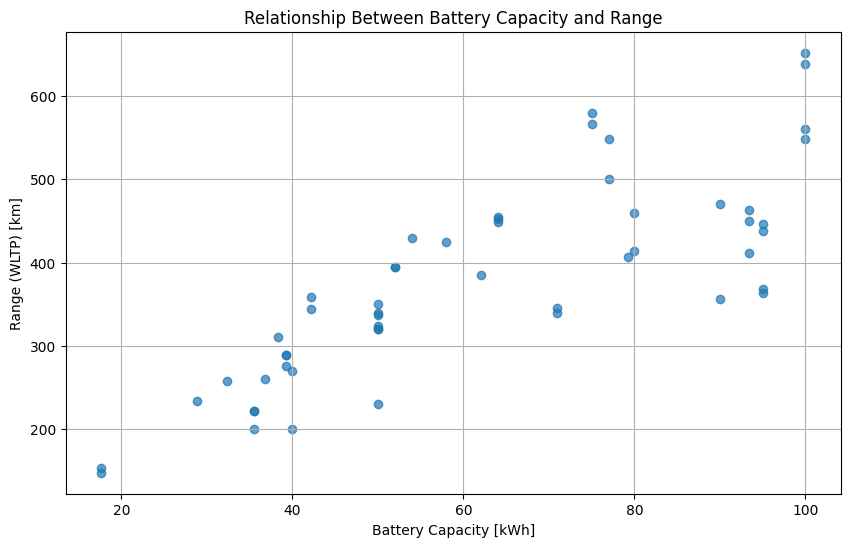

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery capacity [kWh]'], df['Range (WLTP) [km]'], alpha=0.7)
plt.title('Relationship Between Battery Capacity and Range')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.grid(True)
plt.show()

## Insights
- As battery capacity goes up, so does the range.
- There are different ranges for the same battery capacity.
- Small increases in battery size (20-60 kWh) lead to big jumps in range.
- After 60 kWh, bigger batteries don't add much range.
- Some EVs with high capacity (around 100 kWh) have exceptional ranges.

## Task 4
### Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. 
### The class should then return the top three EVs matching their criteria. 

In [7]:
class EVRecommendation:
    
    def recommend(budget, desired_range, battery_capacity):
        filtered_data = df[
            (df['Minimal price (gross) [PLN]'] <= budget) & 
            (df['Range (WLTP) [km]'] >= desired_range) & 
            (df['Battery capacity [kWh]'] >= battery_capacity)
        ]
        filtered_data = filtered_data.sort_values(by=['Battery capacity [kWh]', 'Minimal price (gross) [PLN]'], ascending=[False, True])
        return filtered_data.head(3)


budget = float(input("Enter your budget (in PLN): "))
desired_range = float(input("Enter your desired range (in km): "))
battery_capacity = float(input("Enter the minimum battery capacity (in kWh): "))
top_evs = EVRecommendation.recommend(budget, desired_range, battery_capacity)
top_evs[['Car full name','Make','Model','Minimal price (gross) [PLN]','Range (WLTP) [km]','Battery capacity [kWh]']]


,Car full name,Make,Model,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
34,Renault Zoe R110,Renault,Zoe R110,135900,395,52.0
35,Renault Zoe R135,Renault,Zoe R135,142900,395,52.0
28,Peugeot e-208,Peugeot,e-208,124900,340,50.0


## Task 5
### Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. 
### What insights can you draw from the test results?
### Recommendations and Conclusion: Provide actionable insights based on your analysis.


In [12]:
from scipy.stats import ttest_ind


tesla_data = df[df['Make'] == 'Tesla']
audi_data = df[df['Make'] == 'Audi']
tesla_power = tesla_data['Engine power [KM]']
audi_power = audi_data['Engine power [KM]']
t_stat, p_value = ttest_ind(tesla_power, audi_power)

print(f"T-statistic: {round(t_stat,2)}")
print(f"P-value: {round(p_value,2)}")


T-statistic: 1.7
P-value: 0.12


### Conclusion
- The t-test results show a T-statistic of 1.7 and a P-value of 0.12. Since the P-value is greater than 0.05, there is no significant difference in the average engine power between Tesla and Audi vehicles.

### Recommendations:
- More data to be collected for futher analysis preferably from different performance metrics i.e Torque, TopSpeed, etc...
- Engine Power would not be recommended as a maketing point for either manufacturer
